In [49]:
# import libraries for dataframe and visualizations
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import plotly as py
import plotly.graph_objs as go

from plotly.offline import init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

# import required libraries for clustering
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
from sklearn.decomposition import PCA
from scipy.stats import pointbiserialr

In [50]:
# Reading the data on which analysis needs to be done

df_uti = pd.read_csv("encoded_dataset.csv", encoding = 'unicode_escape', index_col = 0)

In [51]:
df_uti.head()

Age  Clarity  Color  Transparency  Spec Gravity  pH Level  Leukocytes  \
0  23.0        1      4             0         1.005       5.0           0   
1  44.0        0      4             2         1.020       6.0           0   
2  22.0        0      5             1         1.025       6.0           0   
3  16.0        0      5             1         1.020       5.0           0   
4  18.0        0      3             1         1.005       6.5           0   

   Nitrite  Protein  Glucose  ...  RBC  WBC  Mucus Threads  \
0        0        0        0  ...    0    0              1   
1        0        0        0  ...    3    0              3   
2        0        2        3  ...    0    0              1   
3        0        0        0  ...    0    0              2   
4        0        0        0  ...    0    0              1   

   Amorphous Urate/Phosphate  DIAGNOSIS  Marital Status_MARRIED  \
0                         -1          0                   False   
1                          0          0                    True   
2                          1          0                   False   
3                          0          0                   False   
4                          0          0                   False   

   Marital Status_SINGLE  Marital Status_WIDOW  FEMALE  FILIPINO  
0                   True                 False    True      True  
1                  False                 False    True      True  
2                   True                 False    True      True  
3                   True                 False    True      True  
4                   True                 False   False      True  

[5 rows x 26 columns]

In [52]:
df_uti.shape

(412, 26)

In [53]:
df_uti.describe()

Age     Clarity       Color  Transparency  Spec Gravity  \
count  412.000000  412.000000  412.000000    412.000000    412.000000   
mean    32.376011    0.041262    3.864078      1.509709      1.015837   
std     17.309634    0.199138    1.376186      1.086257      0.008456   
min      0.083300    0.000000    0.000000     -1.000000      1.005000   
25%     20.750000    0.000000    4.000000      1.000000      1.010000   
50%     31.000000    0.000000    4.000000      1.000000      1.015000   
75%     45.000000    0.000000    4.250000      2.000000      1.025000   
max     88.000000    1.000000    8.000000      4.000000      1.030000   

         pH Level  Leukocytes     Nitrite     Protein     Glucose  ...  \
count  412.000000  412.000000  412.000000  412.000000  412.000000  ...   
mean     5.923544    1.048544    0.135922    0.524272    0.233010  ...   
std      0.652231    1.432189    0.479224    0.921172    0.879105  ...   
min      5.000000    0.000000    0.000000    0.000000    0.000000  ...   
25%      6.000000    0.000000    0.000000    0.000000    0.000000  ...   
50%      6.000000    0.000000    0.000000    0.000000    0.000000  ...   
75%      6.000000    2.000000    0.000000    1.000000    0.000000  ...   
max      8.000000    4.000000    2.000000    5.000000    5.000000  ...   

       Urobilinogen   Bilirubin       Blood    Bacteria  Epithelial Cells  \
count    412.000000  412.000000  412.000000  412.000000        412.000000   
mean       1.007282    0.033981    1.016990    1.281553          1.825243   
std        0.147799    0.332813    1.582201    1.156111          0.797529   
min        1.000000    0.000000    0.000000    0.000000          0.000000   
25%        1.000000    0.000000    0.000000    0.000000          1.000000   
50%        1.000000    0.000000    0.000000    1.000000          2.000000   
75%        1.000000    0.000000    2.000000    2.000000          2.000000   
max        4.000000    4.000000    4.000000    4.000000          4.000000   

              RBC         WBC  Mucus Threads  Amorphous Urate/Phosphate  \
count  412.000000  412.000000     412.000000                 412.000000   
mean     1.014563    1.050971       1.708738                   1.121359   
std      1.570650    1.441419       0.746522                   1.135505   
min      0.000000   -1.000000       0.000000                  -1.000000   
25%      0.000000    0.000000       1.000000                   0.000000   
50%      0.000000    0.000000       2.000000                   1.000000   
75%      2.000000    2.000000       2.000000                   2.000000   
max      4.000000    4.000000       3.000000                   3.000000   

        DIAGNOSIS  
count  412.000000  
mean     0.509709  
std      0.500514  
min      0.000000  
25%      0.000000  
50%      1.000000  
75%      1.000000  
max      1.000000  

[8 rows x 21 columns]

In [54]:
# df_uti.describe(include='O')

> Amorphous Urate/Phosphate has 1 missing value (null)

In [55]:
df_uti.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412 entries, 0 to 411
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        412 non-null    float64
 1   Clarity                    412 non-null    int64  
 2   Color                      412 non-null    int64  
 3   Transparency               412 non-null    int64  
 4   Spec Gravity               412 non-null    float64
 5   pH Level                   412 non-null    float64
 6   Leukocytes                 412 non-null    int64  
 7   Nitrite                    412 non-null    int64  
 8   Protein                    412 non-null    int64  
 9   Glucose                    412 non-null    int64  
 10  Ketones                    412 non-null    int64  
 11  Urobilinogen               412 non-null    int64  
 12  Bilirubin                  412 non-null    int64  
 13  Blood                      412 non-null    int64  
 14 

## Data Dictionary

In [56]:
print("Columns, Definition, Description, Data Type (Nominal or Numeric)")

Columns, Definition, Description, Data Type (Nominal or Numeric)


Column Name  |Definition    |Description  |Data Type
------------- | ------------- | ------------- | -------------
Patient Number           | Patient Number       | Unique code for patient. | Nominal
Age                      | Patient Age          | The age of the patient. | Numeric
Sex                      | Patient Sex          | The Biological and physiological characteristics of a person. | Nominal
Ethnicity                | Patient Ethnicity    | The ethnic group of the patient. | Nominal
Marital Status           | Marital Status       | Patient's legal marital state. | Nominal
Clarity                  | Urine Clarity        | The clarity of the patient's urine. | Nominal
Color                    | Urine Color          | The color of the patient's urine. | Nominal
Transparency             | Urine Transparency   | How transparent the patient's urine is. | Nominal
Spec Gravity             | Urine Specific Gravity| Concentration of solutes in urine. | Numeric
pH Level                 | Urine Acidity        | The Acidity Level of the urine sample. | Numeric
Leukocytes               | Urine Leukocytes     | Presence of Leukocytes in the urine. | Nominal
Nitrite                  | Urine Nitrite        | Presence of Nitrite in the urine. | Nominal
Protein                  | Urine Protein        | Presence of Protein in the urine. | Nominal
Glucose                  | Urine Glucose        | Approximate number of Glucose in the urine. | Nominal
Ketones                  | Urine Ketones        | Approximate number of Ketone in the urine. | Nominal
Urobilinogen             | Urine Urobilinogen   | Approximate amount of Urobilinogen in the urine. | Nominal
Bilirubin                | Urine Bilirubin      | Approximate number of Bilirubin in the urine. | Nominal
Blood                    | Blood in Urine       | Approximate number of Blood in the urine. | Nominal
Bacteria                 | Bacteria in Urine    | The presence of bacteria in the urine. | Nominal
Epithelial Cells         | Urine Epithelial Cells | The presence of epithelial cells in the urine. | Nominal
RBC                      | Red Blood Cell       | Approximate number of red blood cells in the blood. | Nominal
WBC                      | White Blood Cell     | Approximate number of white blood cells in the blood. | Nominal
Mucus Threads            | Mucus Threads in Urine | The presence of epithelial cells in the urine. | Nominal
Amorphous Urate/Phosphate | Amorphous Urate/Phosphate | The presence of epithelial cells in the urine. | Nominal
DIAGNOSIS                | UTI Diagnosis            | The doctor's diagnosis on the patient (Positive or Negative). | Nominal

## Data Cleaning

In [57]:
# Calculating the Missing Values % contribution in DF
df_null = round(100*(df_uti.isnull().sum())/len(df_uti), 2)
df_null


Age                          0.0
Clarity                      0.0
Color                        0.0
Transparency                 0.0
Spec Gravity                 0.0
pH Level                     0.0
Leukocytes                   0.0
Nitrite                      0.0
Protein                      0.0
Glucose                      0.0
Ketones                      0.0
Urobilinogen                 0.0
Bilirubin                    0.0
Blood                        0.0
Bacteria                     0.0
Epithelial Cells             0.0
RBC                          0.0
WBC                          0.0
Mucus Threads                0.0
Amorphous Urate/Phosphate    0.0
DIAGNOSIS                    0.0
Marital Status_MARRIED       0.0
Marital Status_SINGLE        0.0
Marital Status_WIDOW         0.0
FEMALE                       0.0
FILIPINO                     0.0
dtype: float64

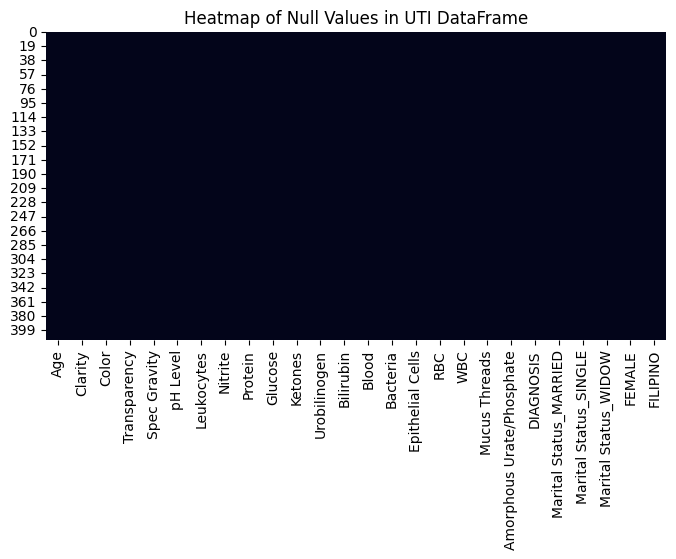

In [58]:
# Create a heatmap of the null values
plt.figure(figsize=(8, 4))
sns.heatmap(df_uti.isnull(), cbar=False)
plt.title('Heatmap of Null Values in UTI DataFrame')
plt.show()

> Minimal nulls with Amorphous Urate/Phospate only have 0.24% nulls\
> The data for the row with the missing amorphous urate was consulted to the clinic and was then fixed.

In [59]:
df_uti = df_uti.dropna()
df_uti.shape

(412, 26)

# Methodology:
1. [Fix data types ](#1) <br>
2. [Separate categorical and numerical columns](#2) <br>
3. [Correlation analysis](#3) <br>
    - Heatmap of Correlation Matrix (numeric features)
    - Point Biserial Correlation (binary variables correlated to continuous variables)
4. [Chi-Square Test for Categorical Variables](#4) <br>
5. [Principal Component Analysis (PCA)](#5) <br>
6. [Outlier Analysis](#6) <br>
7. [Univariate and Bivariate analysis](#7) <br>
- Scatter Plots: Plot scatter plots of paired features, such as pH Level vs. Spec Gravity, and color the points by Diagnosis to see patterns between feature pairs.
- Stacked Bar Charts or Grouped Bar Charts: For categorical features like Sex and Marital Status, use bar charts with counts for positive and negative diagnoses to see if these categories relate to UTI prevalence.

<a id="1"></a> <br>
## 1 : Fix Data Types

In [60]:
# Fixing data types in df_uti
df_uti['Age'] = df_uti['Age'].astype(int)
df_uti['Spec Gravity'] = df_uti['Spec Gravity'].astype(float)
df_uti['pH Level'] = df_uti['pH Level'].astype(float)

# # Convert categorical columns to 'category' data type
# categorical_columns = ['Sex', 'Ethnicity', 'Marital Status', 'Clarity', 'Color', 'Transparency', 'Leukocytes', 'Nitrite', 'Protein', 'Glucose', 'Ketones', 'Urobilinogen', 'Bilirubin', 'Blood', 'Bacteria', 'Epithelial Cells', 'RBC', 'WBC', 'Mucus Threads', 'Amorphous Urate/Phosphate', 'DIAGNOSIS']
# for col in categorical_columns:
# 	df_uti[col] = df_uti[col].astype('object')

df_uti.dtypes

Age                            int32
Clarity                        int64
Color                          int64
Transparency                   int64
Spec Gravity                 float64
pH Level                     float64
Leukocytes                     int64
Nitrite                        int64
Protein                        int64
Glucose                        int64
Ketones                        int64
Urobilinogen                   int64
Bilirubin                      int64
Blood                          int64
Bacteria                       int64
Epithelial Cells               int64
RBC                            int64
WBC                            int64
Mucus Threads                  int64
Amorphous Urate/Phosphate      int64
DIAGNOSIS                      int64
Marital Status_MARRIED          bool
Marital Status_SINGLE           bool
Marital Status_WIDOW            bool
FEMALE                          bool
FILIPINO                        bool
dtype: object

<a id="2"></a> <br>
## 2 : Separate Categorical and Numerical Columns

In [61]:
# Separate the categorical and numerical column
cat_col = [col for col in df_uti.columns if df_uti[col].dtype=='object']
num_col = [col for col in df_uti.columns if df_uti[col].dtype!='object']
print(cat_col)
print(num_col)

[]
['Age', 'Clarity', 'Color', 'Transparency', 'Spec Gravity', 'pH Level', 'Leukocytes', 'Nitrite', 'Protein', 'Glucose', 'Ketones', 'Urobilinogen', 'Bilirubin', 'Blood', 'Bacteria', 'Epithelial Cells', 'RBC', 'WBC', 'Mucus Threads', 'Amorphous Urate/Phosphate', 'DIAGNOSIS', 'Marital Status_MARRIED', 'Marital Status_SINGLE', 'Marital Status_WIDOW', 'FEMALE', 'FILIPINO']


<a id="3"></a> <br>
## 3 : Correlation Analysis

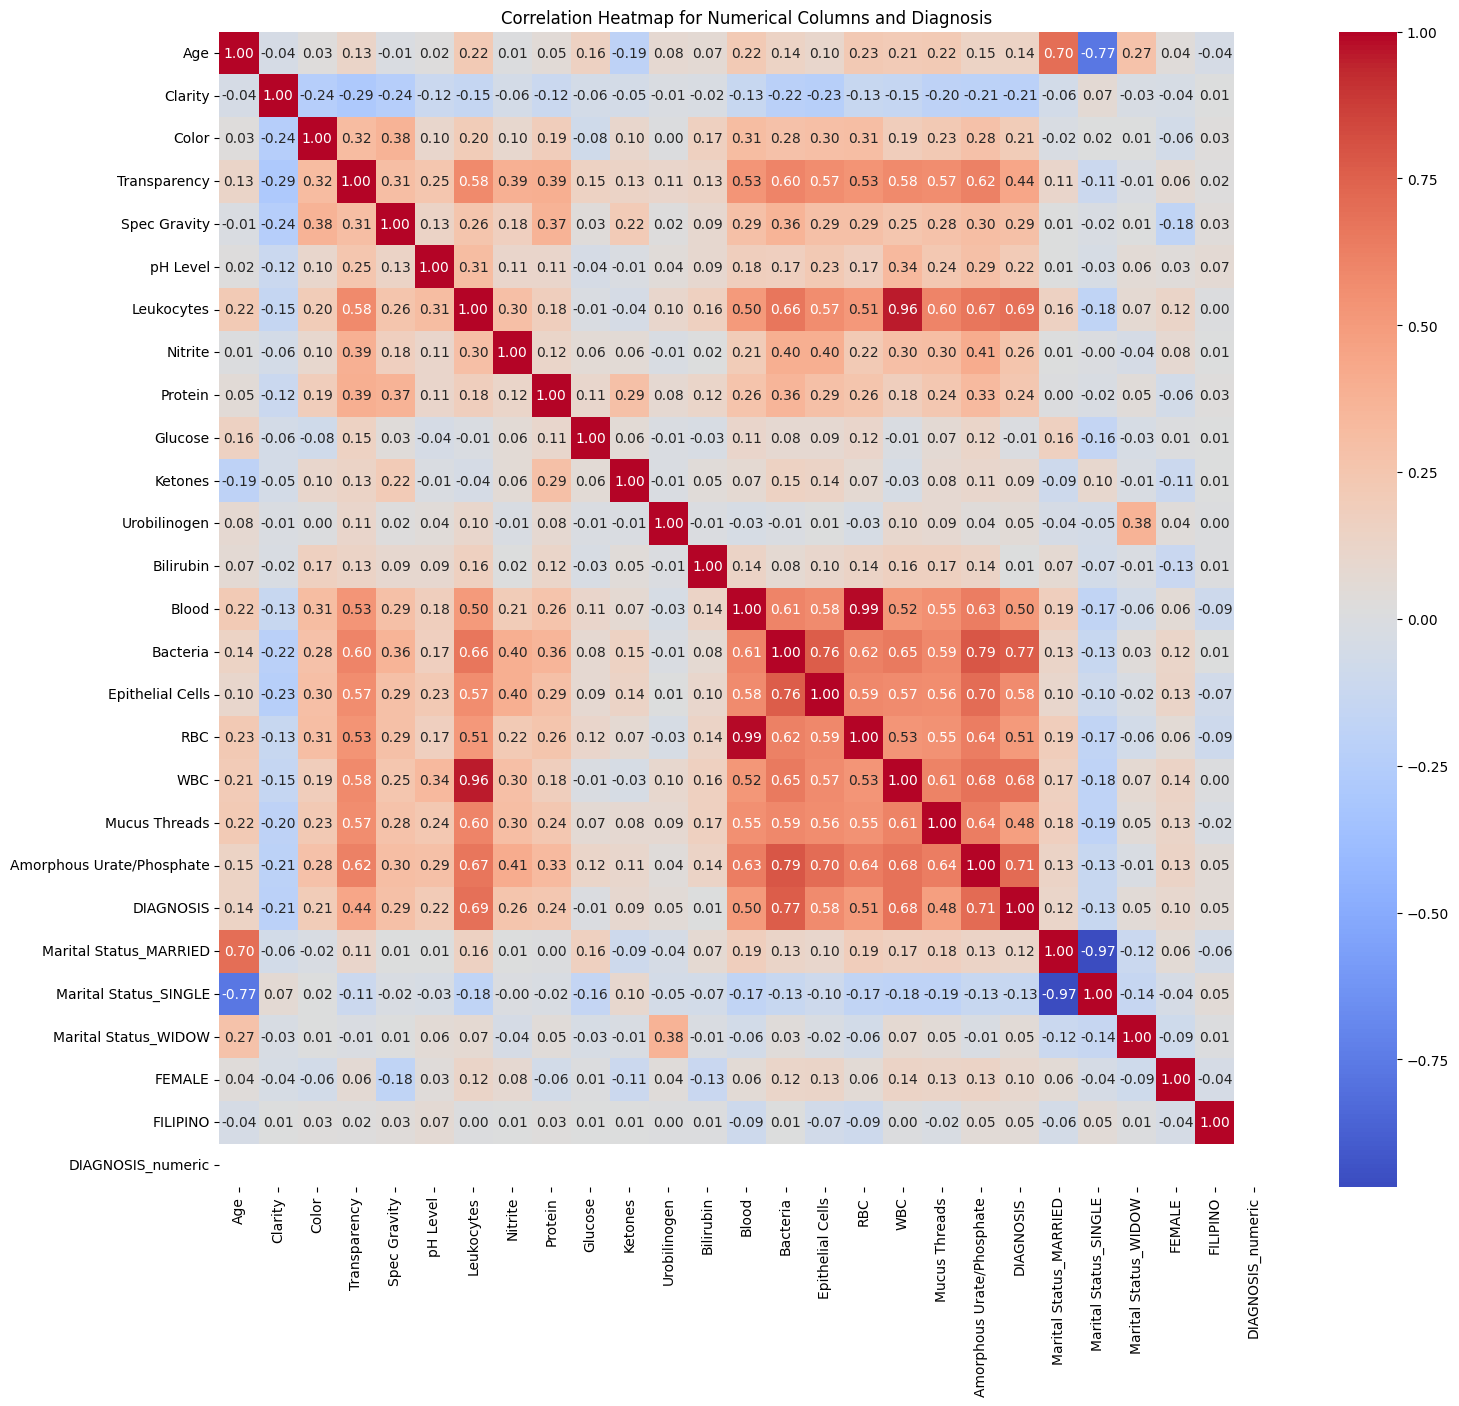

In [62]:
# Convert the 'DIAGNOSIS' column to numeric for correlation analysis
df_uti['DIAGNOSIS_numeric'] = df_uti['DIAGNOSIS'].apply(lambda x: 1 if x == 'UTI' else 0)

# Calculate the correlation matrix
correlation_matrix = df_uti[num_col + ['DIAGNOSIS_numeric']].corr()

# Plot the heatmap
plt.figure(figsize=(17, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for Numerical Columns and Diagnosis')
plt.show()

> All of the numerical columns have a low correlation with the diagnosis with the closest one among them being Age.

In [63]:
from scipy.stats import pointbiserialr

# Ensure DIAGNOSIS_numeric column is created
if 'DIAGNOSIS_numeric' not in df_uti.columns:
    df_uti['DIAGNOSIS_numeric'] = df_uti['DIAGNOSIS'].apply(lambda x: 1 if x == 'UTI' else 0)

# Calculate Point Biserial Correlation for numerical columns and DIAGNOSIS_numeric
point_biserial_results = {}
for col in num_col:
    if df_uti[col].nunique() > 1:  # Check if the column has more than one unique value
        correlation, p_value = pointbiserialr(df_uti[col], df_uti['DIAGNOSIS_numeric'])
        point_biserial_results[col] = {'correlation': correlation, 'p_value': p_value}
    else:
        point_biserial_results[col] = {'correlation': None, 'p_value': None}

# Display results
for col, result in point_biserial_results.items():
    correlation = result['correlation']
    p_value = result['p_value']
    if correlation is not None:
        significance = 'Significant' if p_value <= 0.05 else 'Not Significant'
        print(f"Column: {col}, Correlation: {correlation}, p-value: {p_value}, Significance: {significance}")
    else:
        print(f"Column: {col} has constant values and correlation is not defined.")




Column: Age, Correlation: nan, p-value: nan, Significance: Not Significant
Column: Clarity, Correlation: nan, p-value: nan, Significance: Not Significant
Column: Color, Correlation: nan, p-value: nan, Significance: Not Significant
Column: Transparency, Correlation: nan, p-value: nan, Significance: Not Significant
Column: Spec Gravity, Correlation: nan, p-value: nan, Significance: Not Significant
Column: pH Level, Correlation: nan, p-value: nan, Significance: Not Significant
Column: Leukocytes, Correlation: nan, p-value: nan, Significance: Not Significant
Column: Nitrite, Correlation: nan, p-value: nan, Significance: Not Significant
Column: Protein, Correlation: nan, p-value: nan, Significance: Not Significant
Column: Glucose, Correlation: nan, p-value: nan, Significance: Not Significant
Column: Ketones, Correlation: nan, p-value: nan, Significance: Not Significant
Column: Urobilinogen, Correlation: nan, p-value: nan, Significance: Not Significant
Column: Bilirubin, Correlation: nan, p-

C:\Users\k3n\AppData\Roaming\Python\Python312\site-packages\scipy\stats\_stats_py.py:5546: ConstantInputWarning:

An input array is constant; the correlation coefficient is not defined.



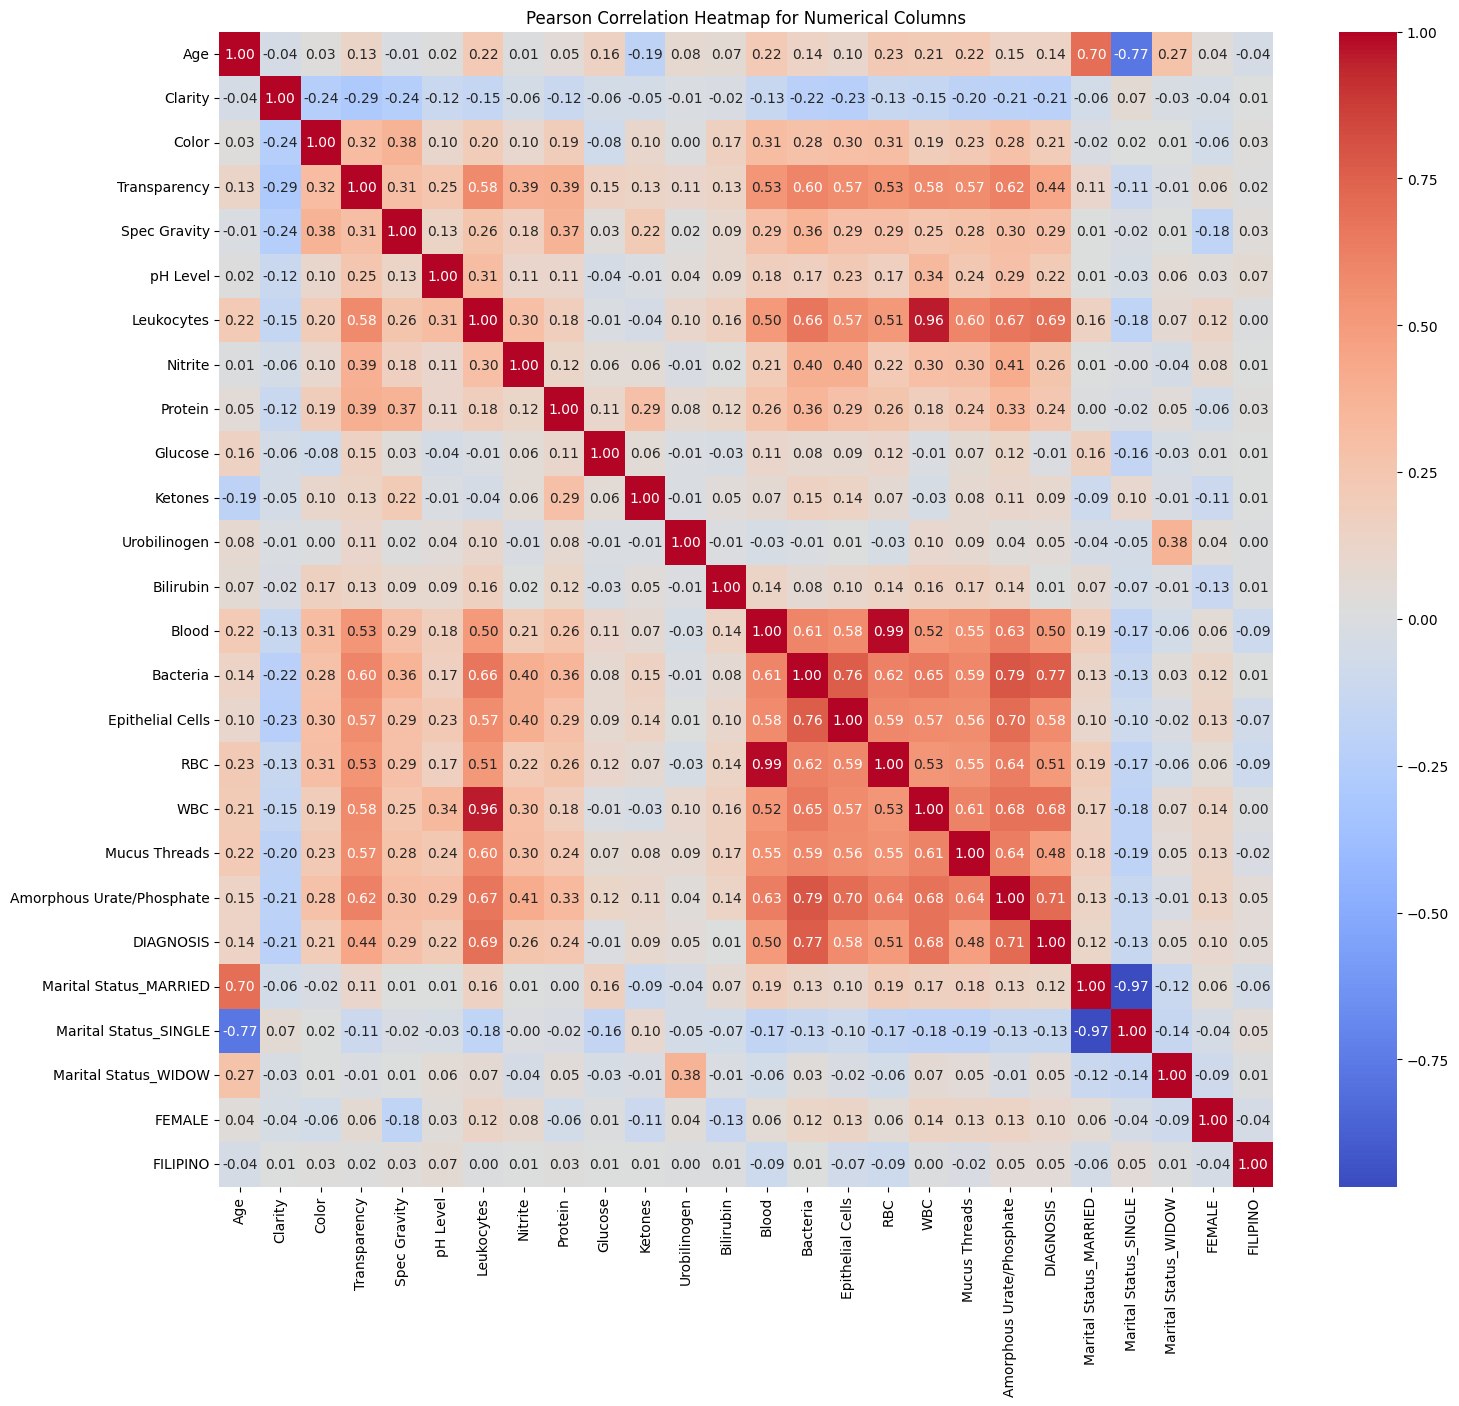

Correlation between Age and Clarity: p-value = 0.44641603058656243, Significance = Not Significant
Correlation between Age and Color: p-value = 0.5814493083515997, Significance = Not Significant
Correlation between Age and Transparency: p-value = 0.010725585466952223, Significance = Significant
Correlation between Age and Spec Gravity: p-value = 0.8855428656136145, Significance = Not Significant
Correlation between Age and pH Level: p-value = 0.6590928878018105, Significance = Not Significant
Correlation between Age and Leukocytes: p-value = 4.807627162116952e-06, Significance = Significant
Correlation between Age and Nitrite: p-value = 0.8858219531457462, Significance = Not Significant
Correlation between Age and Protein: p-value = 0.29399751671330665, Significance = Not Significant
Correlation between Age and Glucose: p-value = 0.001090818428614732, Significance = Significant
Correlation between Age and Ketones: p-value = 9.167823522560307e-05, Significance = Significant
Correlation 

In [70]:
from scipy.stats import pearsonr

# Calculate the Pearson correlation matrix for numerical columns
pearson_correlation_matrix = df_uti[num_col].corr(method='pearson')

# Display the Pearson correlation matrix
plt.figure(figsize=(17, 15))
sns.heatmap(pearson_correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Pearson Correlation Heatmap for Numerical Columns')
plt.show()
# Display the p-values and significance
for col in pearson_correlation_matrix.columns:
    for row in pearson_correlation_matrix.index:
        if col != row:
            correlation, p_value = pearsonr(df_uti[col], df_uti[row])
            significance = 'Significant' if p_value <= 0.05 else 'Not Significant'
            print(f"Correlation between {col} and {row}: p-value = {p_value}, Significance = {significance}")

In [71]:
from scipy.stats import pearsonr

# Function to calculate Pearson correlation and p-values
def calculate_pearson_correlation(df, num_cols):
    pearson_results = {}
    for col1 in num_cols:
        for col2 in num_cols:
            if col1 != col2:
                correlation, p_value = pearsonr(df[col1], df[col2])
                pearson_results[(col1, col2)] = {'correlation': correlation, 'p_value': p_value}
    return pearson_results

# Calculate Pearson correlation and p-values
pearson_results = calculate_pearson_correlation(df_uti, num_col)

# Separate significant and not significant results
significant_pearson_results = {pair: result for pair, result in pearson_results.items() if result['p_value'] <= 0.05}
not_significant_pearson_results = {pair: result for pair, result in pearson_results.items() if result['p_value'] > 0.05}

# Display significant results
print("Significant Pearson Correlation Results:")
for pair, result in significant_pearson_results.items():
    print(f"Columns: {pair}, Correlation: {result['correlation']}, p-value: {result['p_value']}")

# Display not significant results
print("\nNot Significant Pearson Correlation Results:")
for pair, result in not_significant_pearson_results.items():
    print(f"Columns: {pair}, Correlation: {result['correlation']}, p-value: {result['p_value']}")

Significant Pearson Correlation Results:
Columns: ('Age', 'Transparency'), Correlation: 0.12558760163429886, p-value: 0.010725585466952223
Columns: ('Age', 'Leukocytes'), Correlation: 0.22312747925700196, p-value: 4.807627162116952e-06
Columns: ('Age', 'Glucose'), Correlation: 0.1603486330425501, p-value: 0.001090818428614732
Columns: ('Age', 'Ketones'), Correlation: -0.19150706910887907, p-value: 9.167823522560307e-05
Columns: ('Age', 'Blood'), Correlation: 0.2211368448254731, p-value: 5.865832312601833e-06
Columns: ('Age', 'Bacteria'), Correlation: 0.14107729841776312, p-value: 0.004114863312741575
Columns: ('Age', 'Epithelial Cells'), Correlation: 0.10318355706398157, p-value: 0.03629336483433797
Columns: ('Age', 'RBC'), Correlation: 0.2274477441553474, p-value: 3.1023260075426863e-06
Columns: ('Age', 'WBC'), Correlation: 0.21250056689667118, p-value: 1.3615865332497693e-05
Columns: ('Age', 'Mucus Threads'), Correlation: 0.21766072513499402, p-value: 8.266248142482067e-06
Columns: (

> Despite the low correlation from as seen form the heatmap, using the biserial correlation test, these features are still proven to have a significance in determining the Diagnosis.

<a id="4"></a> <br>
## 4 : Chi-Square Test for Categorical Variables

In [64]:
# Check association between categorical variables and Diagnosis using Chi-square test
from scipy.stats import chi2_contingency

# Function to perform chi-square test
def chi_square_test(df, cat_cols, target_col):
    chi2_results = {}
    for col in cat_cols:
        if col != target_col:
            contingency_table = pd.crosstab(df[col], df[target_col])
            chi2, p, dof, ex = chi2_contingency(contingency_table)
            chi2_results[col] = p
    return chi2_results

# Perform chi-square test
chi2_results = chi_square_test(df_uti, cat_col, 'DIAGNOSIS')

# Display results
for col, p_value in chi2_results.items():
    print(f"Column: {col}, p-value: {p_value}")

In [65]:
# Check association between categorical variables and Diagnosis using Chi-square test
from scipy.stats import chi2_contingency

# Function to perform chi-square test
def chi_square_test(df, cat_cols, target_col):
    chi2_results = {}
    for col in cat_cols:
        if col != target_col:
            contingency_table = pd.crosstab(df[col], df[target_col])
            chi2, p, dof, ex = chi2_contingency(contingency_table)
            chi2_results[col] = {'chi2': chi2, 'p_value': p, 'dof': dof}
    return chi2_results

# Perform chi-square test
chi2_results = chi_square_test(df_uti, cat_col, 'DIAGNOSIS')

# Display results
for col, result in chi2_results.items():
    chi2_stat = result['chi2']
    p_value = result['p_value']
    dof = result['dof']
    significance = 'Significant' if p_value <= 0.05 else 'Not Significant'
    print(f"Column: {col}, Chi2: {chi2_stat}, p-value: {p_value}, dof: {dof}, Significance: {significance}")

In [66]:
# Separate significant and not significant results
significant_results = {col: result for col, result in chi2_results.items() if result['p_value'] <= 0.05}
not_significant_results = {col: result for col, result in chi2_results.items() if result['p_value'] > 0.05}

# Display significant results
print("Significant Results:")
for col, result in significant_results.items():
    print(f"Column: {col}, Chi2: {result['chi2']}, p-value: {result['p_value']}, dof: {result['dof']}")

# Display not significant results
print("\nNot Significant Results:")
for col, result in not_significant_results.items():
    print(f"Column: {col}, Chi2: {result['chi2']}, p-value: {result['p_value']}, dof: {result['dof']}")

Significant Results:

Not Significant Results:


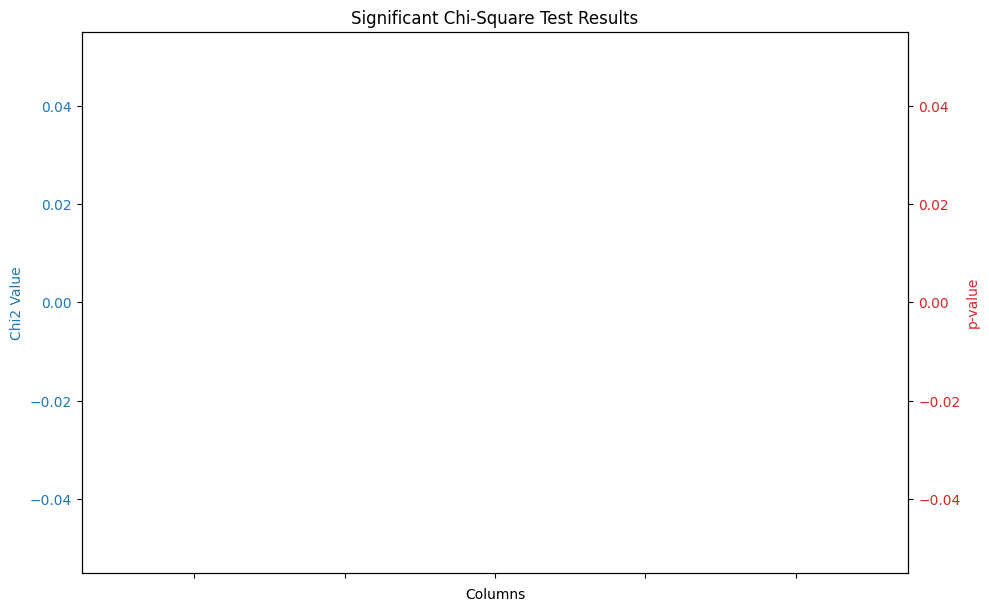

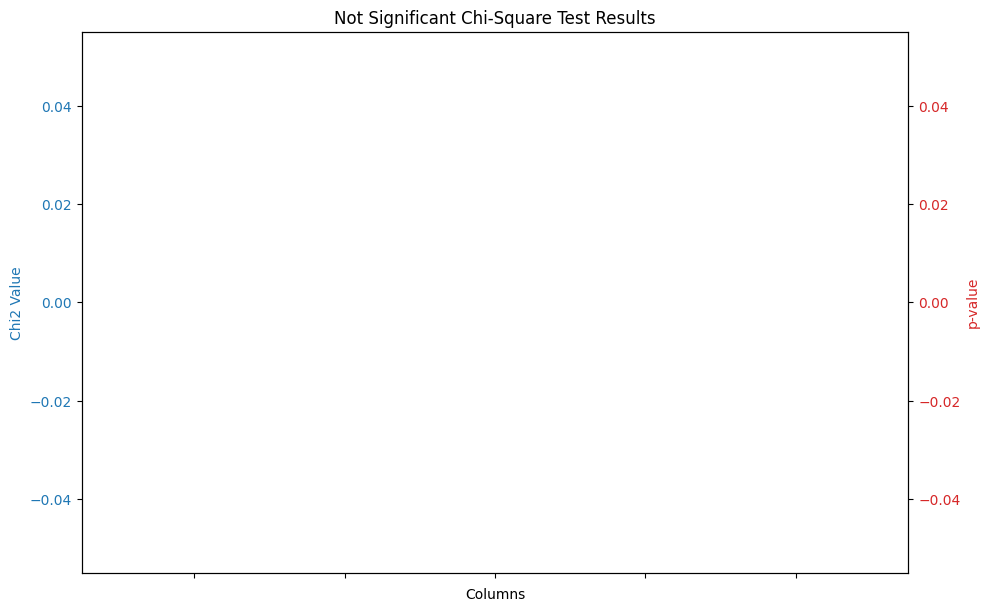

In [67]:
# Function to plot chi-square test results
def plot_chi_square_results(results, title):
    columns = list(results.keys())
    chi2_values = [results[col]['chi2'] for col in columns]
    p_values = [results[col]['p_value'] for col in columns]

    fig, ax1 = plt.subplots(figsize=(10, 6))

    color = 'tab:blue'
    ax1.set_xlabel('Columns')
    ax1.set_ylabel('Chi2 Value', color=color)
    ax1.bar(columns, chi2_values, color=color, alpha=0.6, label='Chi2 Value')
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.set_xticklabels(columns, rotation=90)

    ax2 = ax1.twinx()
    color = 'tab:red'
    ax2.set_ylabel('p-value', color=color)
    ax2.plot(columns, p_values, color=color, marker='o', linestyle='dashed', linewidth=2, markersize=5, label='p-value')
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()
    plt.title(title)
    plt.show()

# Plot significant results
plot_chi_square_results(significant_results, 'Significant Chi-Square Test Results')

# Plot not significant results
plot_chi_square_results(not_significant_results, 'Not Significant Chi-Square Test Results')

> The Categorical columns that show significant results in the chi-square tests (< 0.05 p-value) means that those features are significantly associated with the diagnosis. Those parameters show a strong relationship between that parameter and whether the diagnosis is positive or negative for UTI.

<a id="5"></a> <br>
## 5 : Principal Component Analysis (PCA)

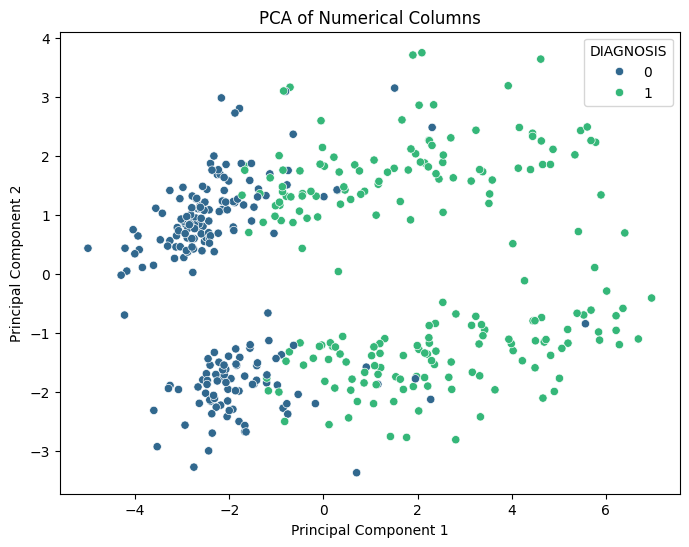

ValueError: No objects to concatenate

In [68]:
# Standardize the numerical columns
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_uti[num_col])

# Perform PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
principal_components = pca.fit_transform(scaled_data)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['DIAGNOSIS'] = df_uti['DIAGNOSIS']

# Plot the PCA results
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='DIAGNOSIS', data=pca_df, palette='viridis')
plt.title('PCA of Numerical Columns')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
# Encode categorical columns using one-hot encoding
df_uti_encoded = pd.get_dummies(df_uti[cat_col], drop_first=True)

# Standardize the encoded categorical data
scaled_cat_data = scaler.fit_transform(df_uti_encoded)

# Perform PCA on the encoded categorical data
pca_cat = PCA(n_components=2)
principal_components_cat = pca_cat.fit_transform(scaled_cat_data)

# Create a DataFrame with the principal components for categorical data
pca_cat_df = pd.DataFrame(data=principal_components_cat, columns=['PC1', 'PC2'])
pca_cat_df['DIAGNOSIS'] = df_uti['DIAGNOSIS']

# Plot the PCA results for categorical data
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='DIAGNOSIS', data=pca_cat_df, palette='viridis')
plt.title('PCA of Categorical Columns')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

> The results from PCA means that the current raw data needs more data transformations and feature engineering 

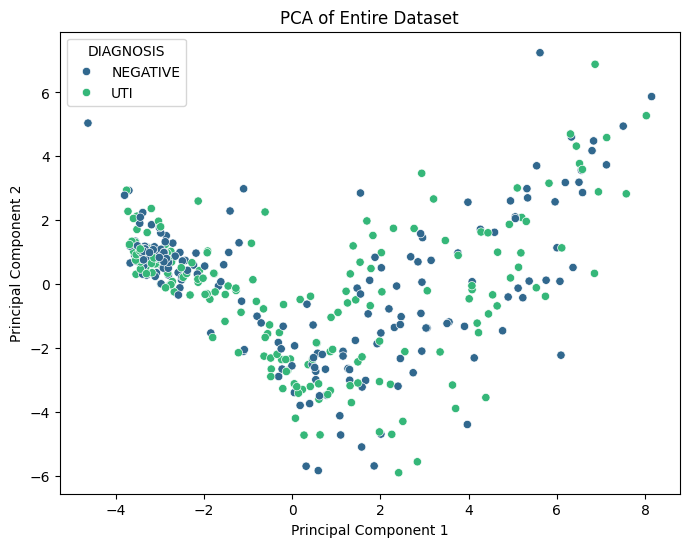

In [ ]:
# Encode categorical columns using one-hot encoding
df_uti_encoded = pd.get_dummies(df_uti, drop_first=True)

# Standardize the entire dataset
scaled_data = scaler.fit_transform(df_uti_encoded)

# Perform PCA on the entire dataset
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['DIAGNOSIS'] = df_uti['DIAGNOSIS']

# Plot the PCA results for the entire dataset
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='DIAGNOSIS', data=pca_df, palette='viridis')
plt.title('PCA of Entire Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

> The PCA plot suggests some degree of association but no strong, distinct separation between UTI and NEGATIVE cases based on the current state of the features.\
> Consider exploring other features or using a supervised learning approach to assess which features (or combinations) are more predictive of the UTI diagnosis.

<a id="6"></a> <br>
## 6 : Outlier Analysis

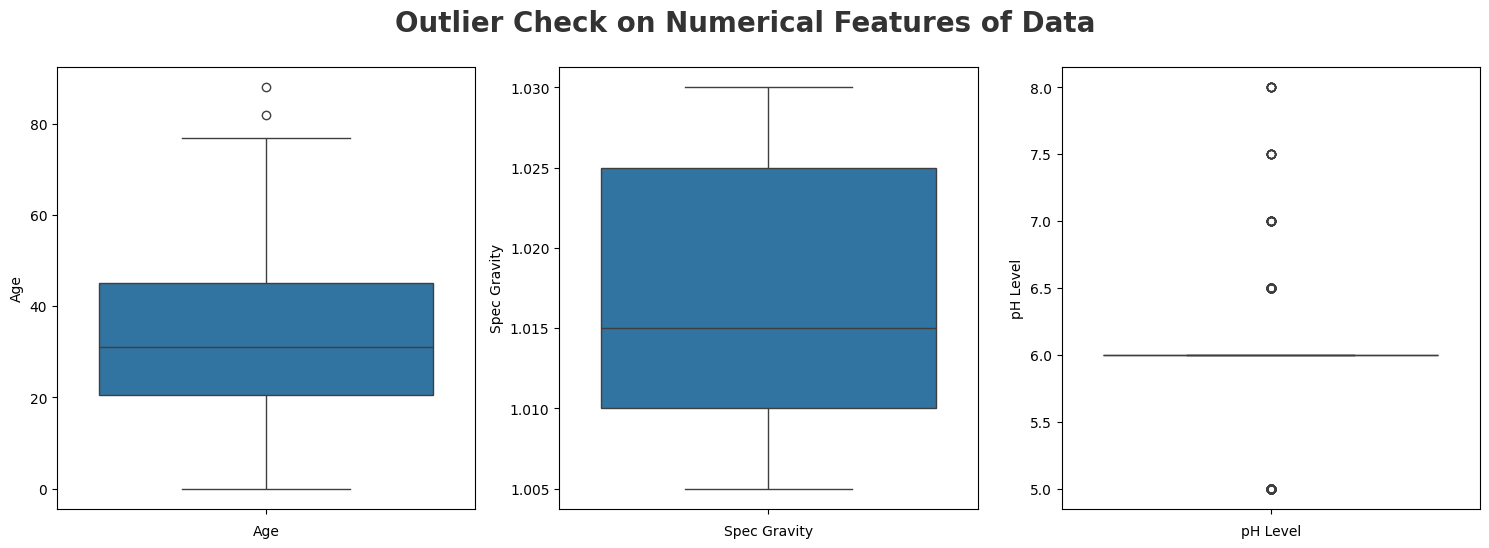

In [ ]:
# Outlier check
plt.figure(figsize=(15, 10))
plt.suptitle('Outlier Check on Numerical Features of Data', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(num_col)):
    plt.subplot(2, 3, i+1)
    sns.boxplot(df_uti[num_col[i]])
    plt.xlabel(num_col[i])
    plt.tight_layout()

> Age and PH Level have few outliers. Also, see that pH level has a very squashed boxplot which may need more analysis

### Investigate pH Level

In [ ]:
# Interquartile Range
pH_Q1 = df_uti["pH Level"].quantile(0.25)
pH_Q3 = df_uti["pH Level"].quantile(0.75)


pH_IQR = pH_Q3 - pH_Q1
pH_outliers = df_uti[(df_uti["pH Level"] > (pH_Q3 + 1.5 * pH_IQR)) | 
                     (df_uti["pH Level"] < (pH_Q1 - 1.5 * pH_IQR))].copy()

In [ ]:
non_outliers_pH = df_uti[(~df_uti.index.isin(pH_outliers.index))]
non_outliers_pH

Age     Sex Ethnicity Marital Status    Clarity         Color  \
Patient Number                                                                  
2                44  FEMALE  FILIPINO        MARRIED  DECREASED        YELLOW   
3                22  FEMALE  FILIPINO         SINGLE  DECREASED   DARK YELLOW   
13               51  FEMALE  FILIPINO        MARRIED  DECREASED        YELLOW   
22               36    MALE  FILIPINO        MARRIED  INCREASED        YELLOW   
23               41  FEMALE  FILIPINO        MARRIED  DECREASED        YELLOW   
...             ...     ...       ...            ...        ...           ...   
408              24  FEMALE  FILIPINO         SINGLE   DECREASE  LIGHT YELLOW   
409              46  FEMALE  FILIPINO        MARRIED   DECREASE  LIGHT YELLOW   
410              33  FEMALE  FILIPINO        MARRIED   DECREASE  LIGHT YELLOW   
411              25  FEMALE  FILIPINO        MARRIED   DECREASE        YELLOW   
412              65    MALE  FILIPINO        MARRIED   DECREASE   DARK YELLOW   

               Transparency  Spec Gravity  pH Level Leukocytes  ... Bilirubin  \
Patient Number                                                  ...             
2                    CLOUDY         1.020       6.0   NEGATIVE  ...  NEGATIVE   
3                      HAZY         1.025       6.0   NEGATIVE  ...  NEGATIVE   
13                     HAZY         1.020       6.0   NEGATIVE  ...  NEGATIVE   
22                    CLEAR         1.010       6.0   NEGATIVE  ...  NEGATIVE   
23                   CLOUDY         1.025       6.0         1+  ...  NEGATIVE   
...                     ...           ...       ...        ...  ...       ...   
408                    HAZY         1.010       6.0   NEGATIVE  ...  NEGATIVE   
409                    HAZY         1.015       6.0   NEGATIVE  ...  NEGATIVE   
410                    HAZY         1.025       6.0   NEGATIVE  ...  NEGATIVE   
411                    HAZY         1.010       6.0   NEGATIVE  ...  NEGATIVE   
412                  CLOUDY         1.030       6.0         2+  ...  NEGATIVE   

                   Blood  Bacteria Epithelial Cells    RBC    WBC  \
Patient Number                                                      
2                     2+       FEW             MANY  20-30    0-2   
3               NEGATIVE  MODERATE         MODERATE    0-2    0-2   
13              NEGATIVE       FEW         MODERATE    0-2    0-2   
22              NEGATIVE      RARE              FEW    0-2    0-2   
23              NEGATIVE      MANY             MANY    0-2   5-10   
...                  ...       ...              ...    ...    ...   
408             NEGATIVE      RARE              FEW    0-2    0-2   
409             NEGATIVE      RARE              FEW    0-2    0-2   
410             NEGATIVE      RARE              FEW    0-2    0-2   
411             NEGATIVE      RARE              FEW    0-2    0-2   
412                   3+  MODERATE             MANY   TNTC  20-30   

               Mucus Threads Amorphous Urate/Phosphate DIAGNOSIS  \
Patient Number                                                     
2                       MANY                      RARE  NEGATIVE   
3                        FEW                       FEW  NEGATIVE   
13                       FEW                      RARE  NEGATIVE   
22                       FEW                      RARE  NEGATIVE   
23                       FEW                      MANY       UTI   
...                      ...                       ...       ...   
408                      FEW                      RARE  NEGATIVE   
409                      FEW                      RARE  NEGATIVE   
410                 MODERATE                      RARE  NEGATIVE   
411                      FEW                      RARE  NEGATIVE   
412                     MANY                      MANY       UTI   

               DIAGNOSIS_numeric  
Patient Number                    
2                              0  
3                   

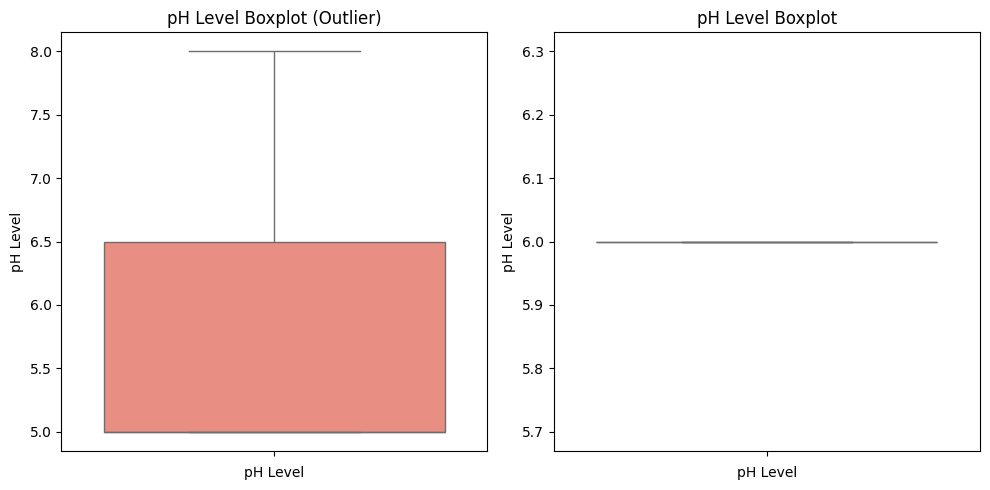

In [ ]:
# Show boxplot for pH Level with and without outliers
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.boxplot(data=pH_outliers["pH Level"], color='salmon')
plt.title('pH Level Boxplot (Outlier)')
plt.xlabel('pH Level')

plt.subplot(1, 2, 2)
sns.boxplot(data=non_outliers_pH["pH Level"], color='salmon')
plt.title('pH Level Boxplot')
plt.xlabel('pH Level')

plt.tight_layout()
plt.show()

> From the boxplots, those from the outliers have a healthy boxplot with distribution of data ranging from 5 to 6.5 while for the one on the right with outliers removed, it has a squished boxplot with only points to 6. This would mean that majority of the data have a pH level of 6. This would also mean that the outliers has a significant meaning and should not be disregarded in this sense since it still contributes to the diagnosis.

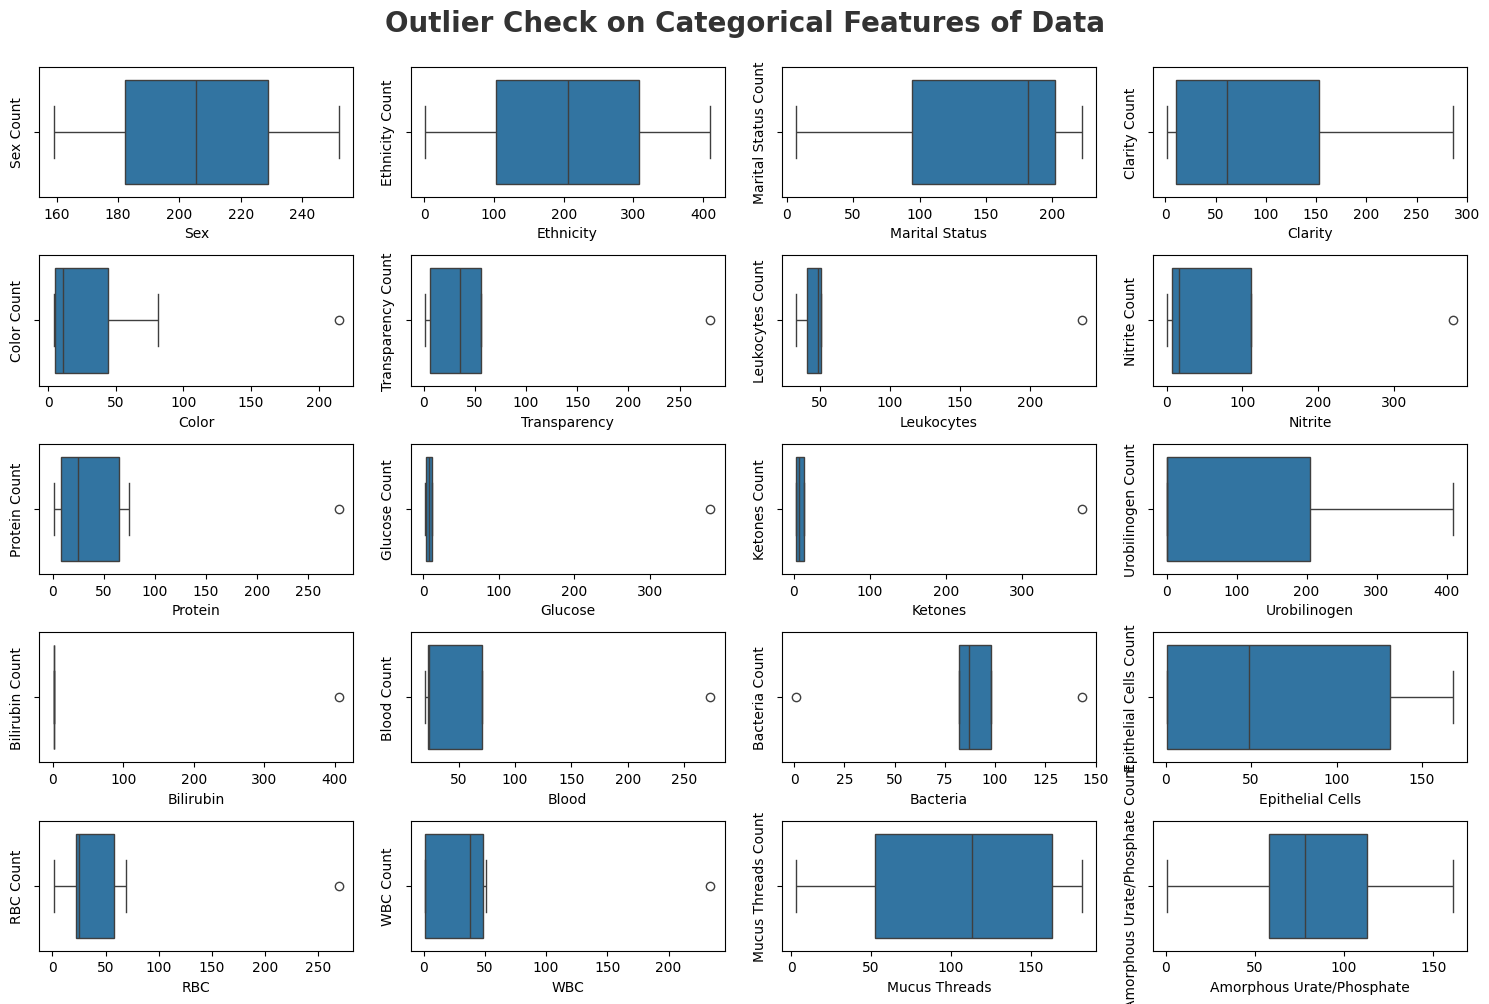

In [ ]:
# Outlier check for categorical columns without comparing with 'DIAGNOSIS'
cat_col_excluding_diagnosis = [col for col in cat_col if col != 'DIAGNOSIS']

# Show boxplot for categorical columns without comparing with 'DIAGNOSIS'
plt.figure(figsize=(15, 10))
plt.suptitle('Outlier Check on Categorical Features of Data', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(cat_col_excluding_diagnosis)):
    plt.subplot(5, 4, i+1)
    sns.boxplot(x=df_uti[cat_col_excluding_diagnosis[i]].value_counts().values)
    plt.xlabel(cat_col_excluding_diagnosis[i])
    label = str(cat_col_excluding_diagnosis[i]) + ' Count'
    plt.ylabel(label)
    plt.tight_layout()

plt.show()

> The categorical features does not seem to have any major outliers which should be taken into account 

<a id="7"></a> <br>
## 7 : Variate Analysis

### Univariate Analysis

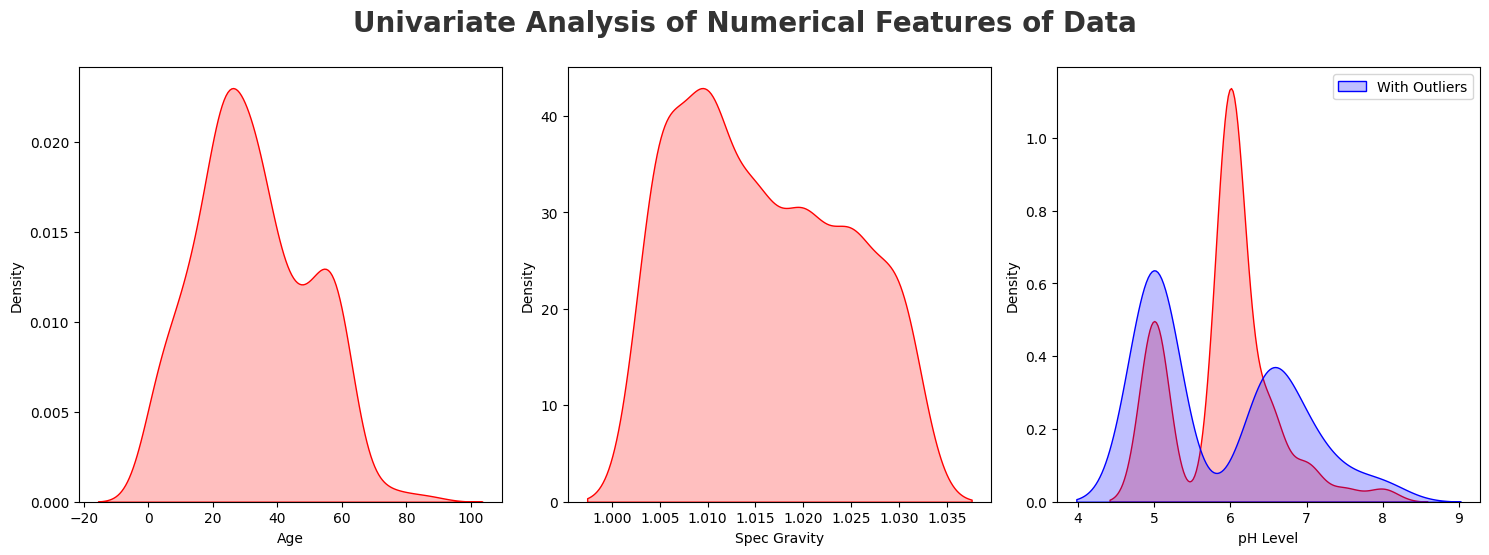

In [ ]:
# Proportion of data distribution for numerical data
plt.figure(figsize=(15, 10))
plt.suptitle('Univariate Analysis of Numerical Features of Data', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(num_col)):
    plt.subplot(2, 3, i+1)
    sns.kdeplot(x=df_uti[num_col[i]], fill=True, color='r', warn_singular=False)
    if num_col[i] == 'pH Level':
        sns.kdeplot(x=pH_outliers['pH Level'], fill=True, color='b', label='With Outliers', warn_singular=False)
        sns.kdeplot(x=non_outliers_pH['pH Level'], fill=True, color='g', label='Without Outliers', warn_singular=False)
        plt.legend()
    plt.xlabel(num_col[i])

plt.tight_layout()
plt.show()

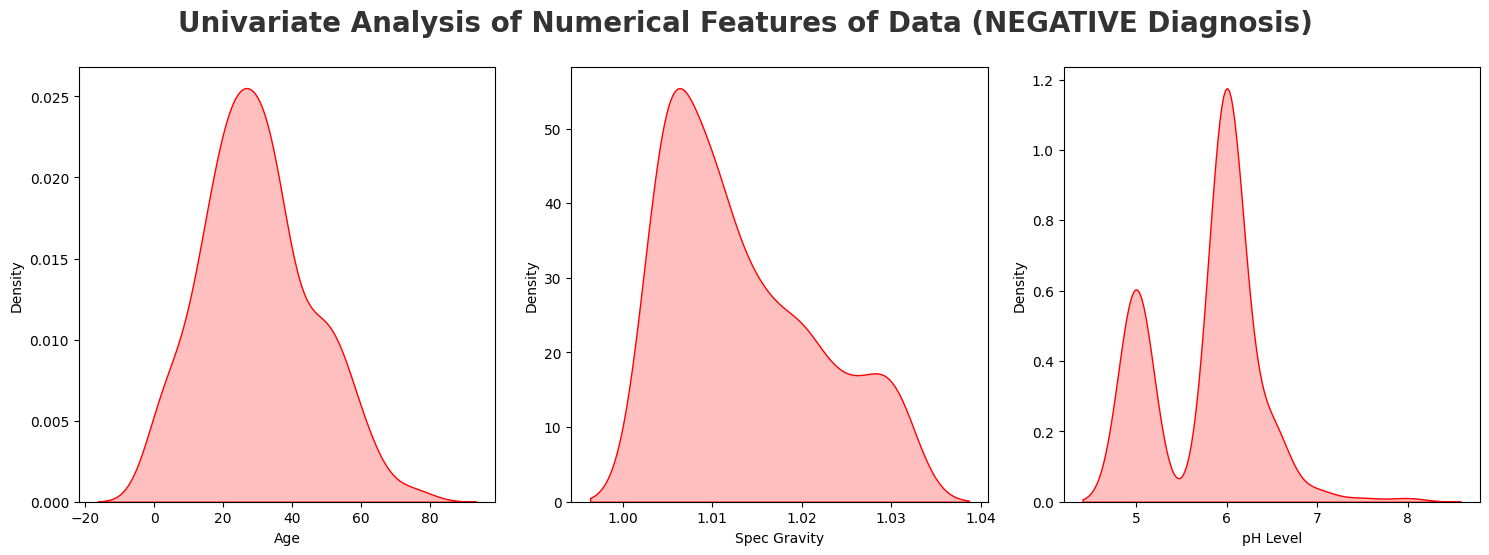

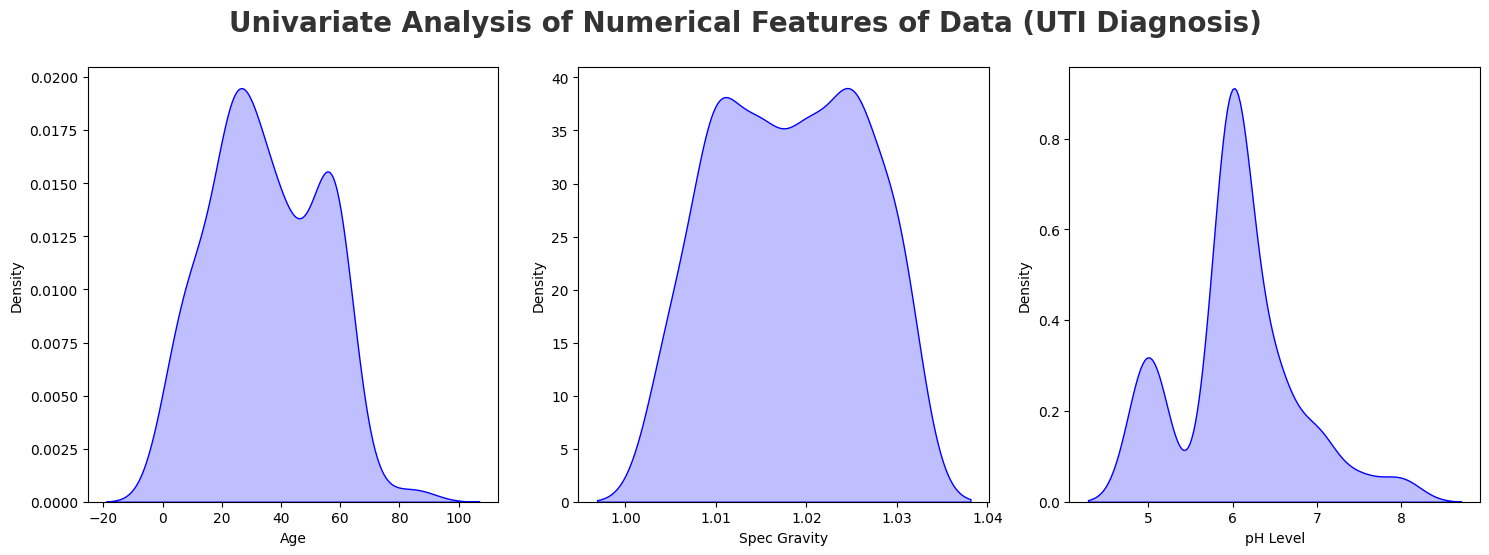

In [ ]:
# Proportion of data distribution for numerical data for 'NEGATIVE' diagnosis
plt.figure(figsize=(15, 10))
plt.suptitle('Univariate Analysis of Numerical Features of Data (NEGATIVE Diagnosis)', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(num_col)):
    plt.subplot(2, 3, i+1)
    sns.kdeplot(x=df_uti[df_uti['DIAGNOSIS'] == 'NEGATIVE'][num_col[i]], fill=True, color='r', warn_singular=False)
    plt.xlabel(num_col[i])

plt.tight_layout()
plt.show()

# Proportion of data distribution for numerical data for 'UTI' diagnosis
plt.figure(figsize=(15, 10))
plt.suptitle('Univariate Analysis of Numerical Features of Data (UTI Diagnosis)', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(num_col)):
    plt.subplot(2, 3, i+1)
    sns.kdeplot(x=df_uti[df_uti['DIAGNOSIS'] == 'UTI'][num_col[i]], fill=True, color='b', warn_singular=False)
    plt.xlabel(num_col[i])

plt.tight_layout()
plt.show()

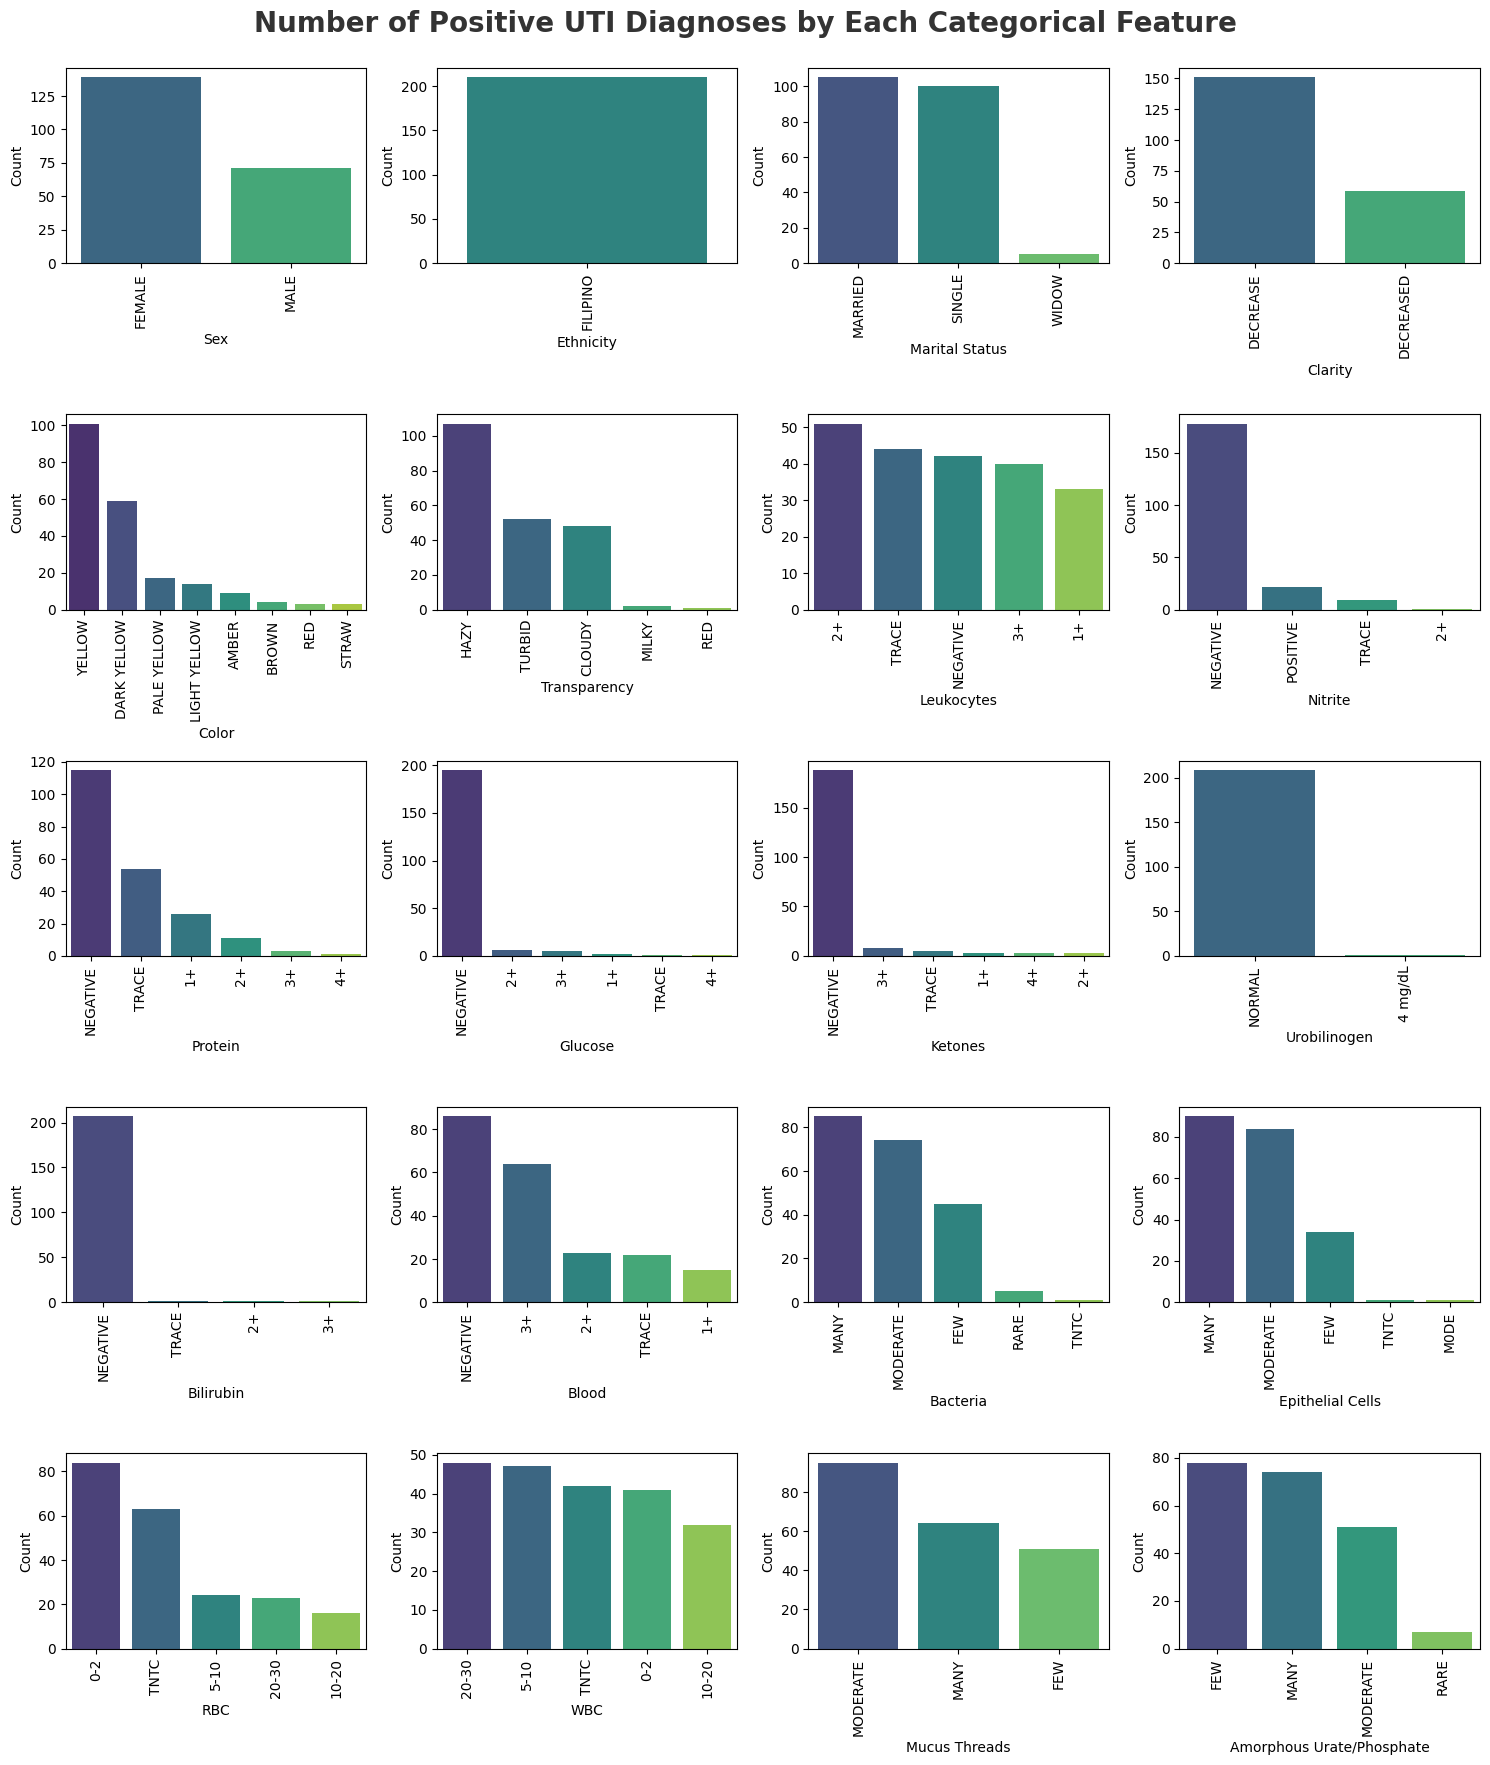

In [ ]:
plt.figure(figsize=(15, 20))
plt.suptitle('Number of Positive UTI Diagnoses by Each Categorical Feature', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i, col in enumerate(cat_col_excluding_diagnosis):
    plt.subplot(6, 4, i+1)
    temp_df = df_uti[df_uti['DIAGNOSIS'] == 'UTI'][col].value_counts()
    sns.barplot(x=temp_df.index, y=temp_df.values, palette='viridis', hue=temp_df.index)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.tight_layout()

plt.show()

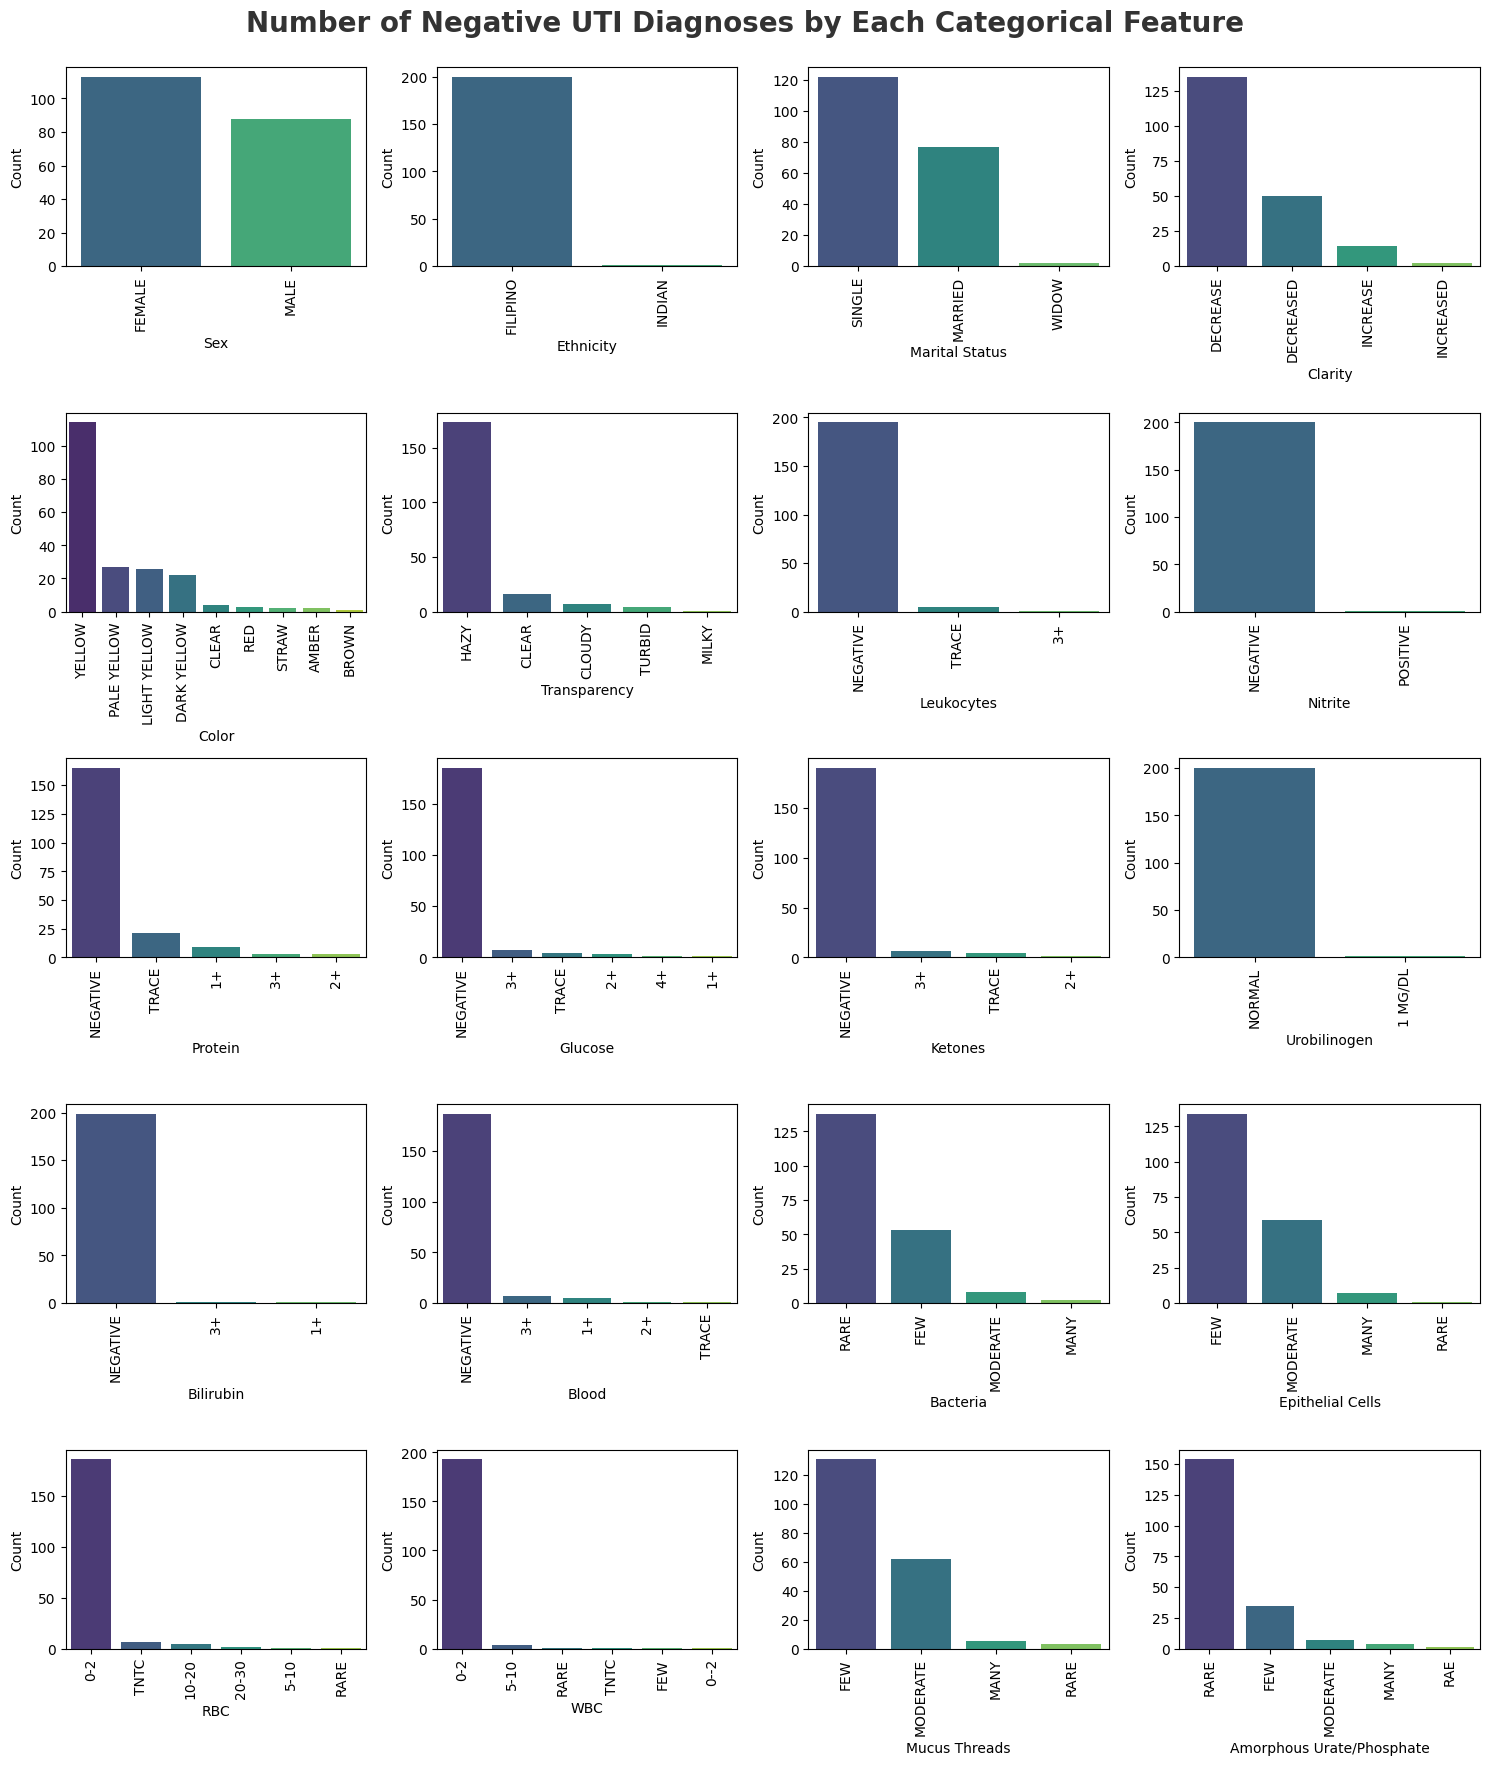

In [ ]:
# Categorical columns excluding 'DIAGNOSIS'
cat_col_excluding_diagnosis = [col for col in cat_col if col != 'DIAGNOSIS']

plt.figure(figsize=(15, 20))
plt.suptitle('Number of Negative UTI Diagnoses by Each Categorical Feature', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i, col in enumerate(cat_col_excluding_diagnosis):
    plt.subplot(6, 4, i+1)
    temp_df = df_uti[df_uti['DIAGNOSIS'] == 'NEGATIVE'][col].value_counts()
    sns.barplot(x=temp_df.index, y=temp_df.values, palette='viridis', hue=temp_df.index)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.tight_layout()

plt.show()

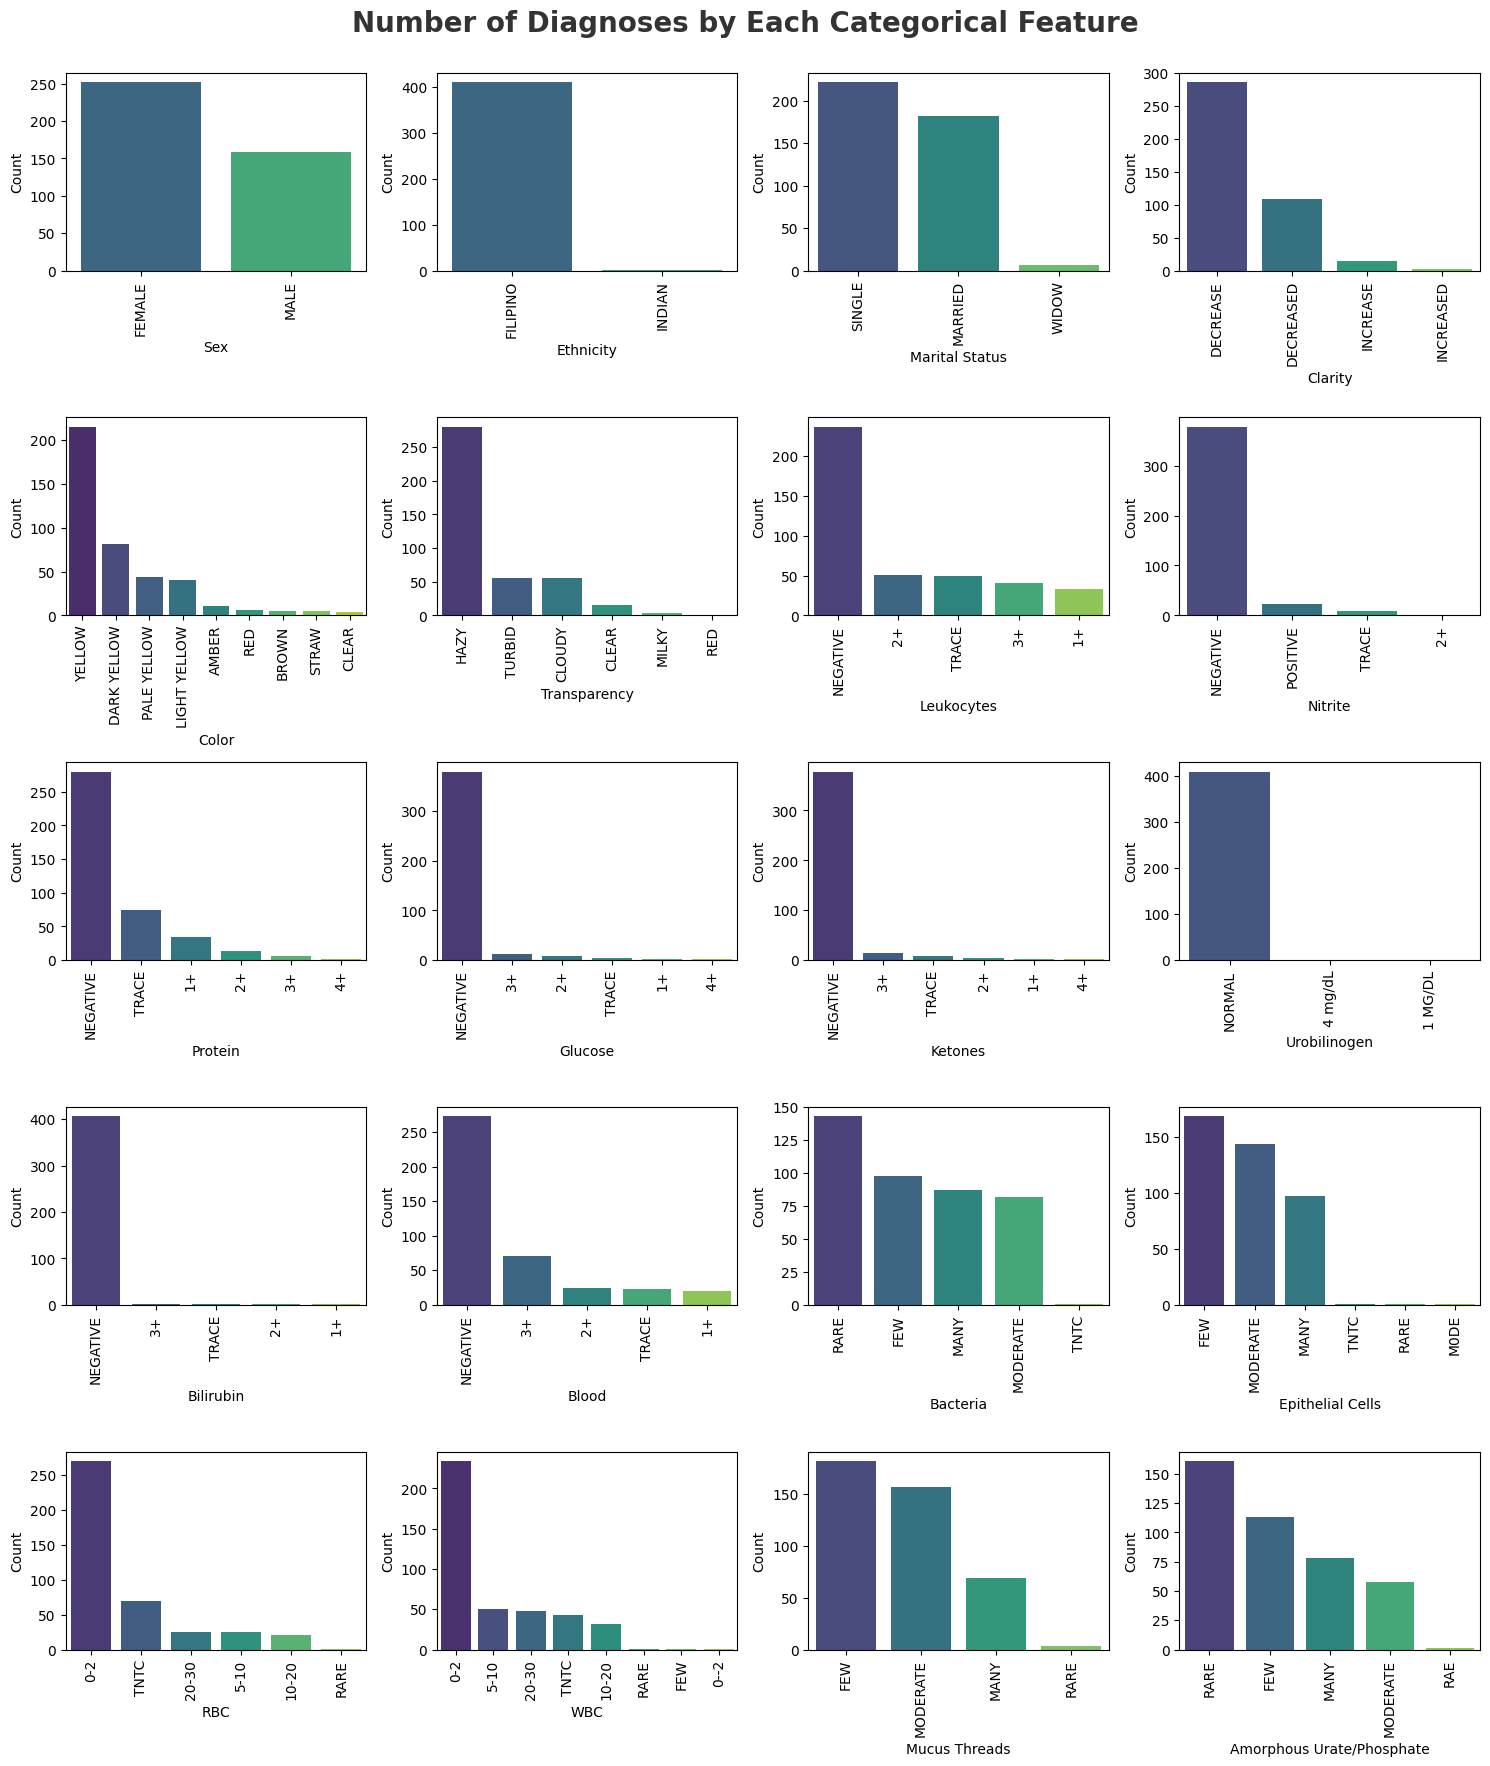

In [ ]:
plt.figure(figsize=(15, 20))
plt.suptitle('Number of Diagnoses by Each Categorical Feature', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i, col in enumerate(cat_col_excluding_diagnosis):
    plt.subplot(6, 4, i+1)
    temp_df = df_uti[col].value_counts()
    sns.barplot(x=temp_df.index, y=temp_df.values, palette='viridis', hue=temp_df.index)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.tight_layout()

plt.show()

### Bivariate Analysis

In [ ]:
cat_col

['Sex',
 'Ethnicity',
 'Marital Status',
 'Clarity',
 'Color',
 'Transparency',
 'Leukocytes',
 'Nitrite',
 'Protein',
 'Glucose',
 'Ketones',
 'Urobilinogen',
 'Bilirubin',
 'Blood',
 'Bacteria',
 'Epithelial Cells',
 'RBC',
 'WBC',
 'Mucus Threads',
 'Amorphous Urate/Phosphate',
 'DIAGNOSIS']

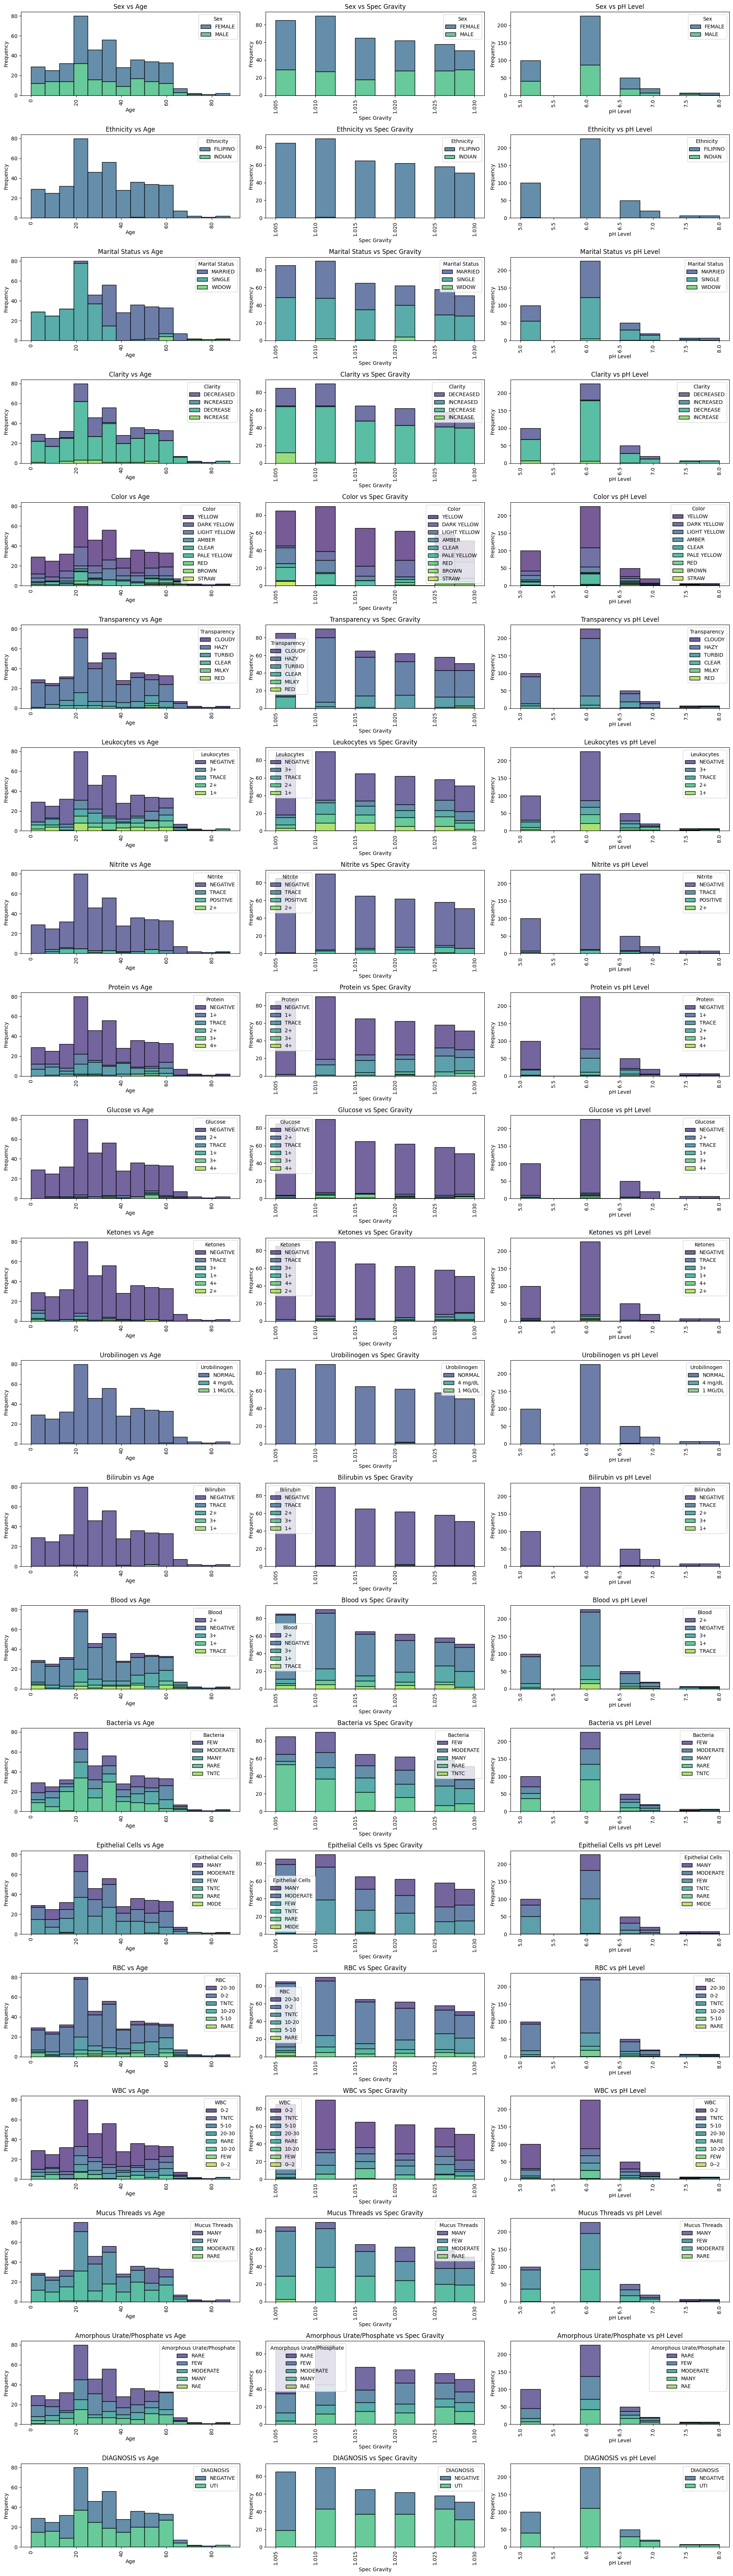

In [ ]:
plt.figure(figsize=(20, 70))
k = 0
for i in cat_col:
    for j in num_col:
        plt.subplot(21, 3, k + 1)
        plt.title(i + ' vs ' + j)
        sns.histplot(data=df_uti, x=j, hue=i, multiple="stack", palette='viridis')
        plt.xlabel(j)
        plt.ylabel('Frequency')
        plt.xticks(rotation=90)
        k = k + 1
plt.tight_layout()
plt.show()

## End of Analysis

Thank you for following through the analysis. The steps and methodologies applied have provided insights into the dataset and its features. The results obtained from various statistical tests and visualizations have helped in understanding the relationships and significance of different variables in diagnosing UTI.

### Summary of Findings:
- **Data Cleaning**: Minimal null values were found and addressed.
- **Correlation Analysis**: Numerical features showed low correlation with the diagnosis, but point biserial correlation indicated significance.
- **Chi-Square Test**: Several categorical features were significantly associated with the diagnosis.
- **PCA**: Principal Component Analysis suggested the need for further feature engineering.
- **Outlier Analysis**: Identified and analyzed outliers in numerical and categorical features.
- **Univariate and Bivariate Analysis**: Provided detailed insights into the distribution and relationships of features.

This concludes the analysis. Further steps could include exploring additional features, applying advanced machine learning models, and validating the findings with external datasets.

Thank you!

-----